#1. Eksplorasi Data Honeypot di London: Analisis Serangan Cyber Berdasarkan Waktu, Port, dan Payload.
1. **Pandas**  
Digunakan untuk memudahkan manipulasi, analisis, dan eksplorasi data yang terstruktur.

2. **NumPy**  
Digunakan untuk komputasi ilmiah dan numerik, terutama operasi pada array multidimensi.

3. **Matplotib**   
Library yang digunakan untuk visualisasi data dasar

4. **Seaborn**  
Library untuk visualisasi data statistik lanjutan dengan tampilan yang menarik dan mudah digunakan.

##3. import dataset yang diambil
link dataset: https://www.kaggle.com/datasets/startingsecurity/cybersecurity-honeypot-attacks/code

In [4]:
# 1. Mount Google Drive
# Dont use if in local environment

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
#import standar libary untuk menggunakan fungsi fungsi yang sudah ada
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Membaca isi dari dataset
df=pd.read_csv("/content/drive/MyDrive/EDA/london.csv")

#link dataset https://www.kaggle.com/datasets/lougarou/honeypot-attack-logs

#2.Mengenali struktur Dataset dan isi data
   * Jumlah observasi (baris) dan variabel (kolom)
   * Tipe data setiap kolom (numerik, kategorikal, teks, tanggal, dll.)



In [7]:
#cek jumlah kolom dan jumlah baris pada dataset
baris, kolom = df.shape
print("baris:", baris)
print("kolom:", kolom)

baris: 70338
kolom: 5


In [8]:
#cek info fungsi info untuk menampilkan kolom apa saja yang terdapat serta tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70338 entries, 0 to 70337
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     70335 non-null  object
 1   payload  70338 non-null  object
 2   from     70335 non-null  object
 3   port     70335 non-null  object
 4   country  70332 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [9]:
#cek data teratas, fungsi head berfungsi melihat lima data teratas
df.head()

,time,payload,from,port,country
0,"05/01/2021, 19:42:28",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\xf5\t...,'162.142.125.55',44354,London
1,"05/01/2021, 19:42:29",'GET / HTTP/1.1\r\nHost: 3.8.136.101:16026\r\n...,'162.142.125.55',53424,London
2,"05/01/2021, 19:43:40",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\xd5y\...,'162.142.125.56',51004,London
3,"05/01/2021, 19:43:42",'GET / HTTP/1.1\r\nHost: 3.8.136.101:3119\r\n\...,'162.142.125.56',59068,London
4,"05/01/2021, 19:44:55",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\x9c\x...,'162.142.125.38',40798,London


In [10]:
#fungsi describe
df.describe()

,time,payload,from,port,country
count,70335,70338,70335,70335,70332
unique,50325,15314,3509,30338,1
top,"05/05/2021, 14:39:10",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.146.166.156',61953,London
freq,50,6394,4097,529,70332


#3 Melakukan pembersihan data
   * Mengekstrak variabel numerik
   * analisis missing values dan penanganan
   * Duplicate records
   * Ringkasan statistik deskriptif (mean, median, min, max, std, dll.)
   * Analisis outliers dan penanganan

In [11]:
#Mengekstrak variabel numerik dari payload
df['payload_len'] = df['payload'].astype(str).apply(len)

In [12]:
#masuk ke data cleansing
print(df.isna().sum())

time           3
payload        0
from           3
port           3
country        6
payload_len    0
dtype: int64


In [13]:
# Hapus baris dengan time kosong dihapus agar data tetap konsisten dan bersih
df = df.dropna(subset=["time"])

In [15]:
# 2. Isi missing pada kolom 'from' (alamat IP asal)
# Kolom 'from' menunjukkan asal serangan, jika nilainya kosong, kita masih bisa simpan barisnya dengan label 'Unknown' bisa dipakai tanpa harus dihapus.
df["from"] = df["from"].fillna("Unknown")

In [17]:
# 3. Isi missing pada kolom 'port'
# Port penting untuk analisis tipe serangan dan diisi dengan angka khusus (misalnya -1) agar tidak rancu dengan port asli untuk memudahkan pemfilteran.
df["port"] = df["port"].fillna(-1)

In [21]:
# 4. Isi missing pada kolom 'country'
# Informasi negara penting untuk analisis geografis, kalau dihapus, kita kehilangan data payload yang masih berguna.
df["country"] = df["country"].fillna("Unknown")

In [23]:
# Total baris duplikat
print("Total duplicate rows:", df.duplicated().sum())

Total duplicate rows: 7


In [26]:
# Tampilan data yang duplikasi
df[df.duplicated()]

,time,payload,from,port,country,payload_len
29676,time,payload,from,port,Unknown,7
31509,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',63380,London,103
31512,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',63380,London,103
31514,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
31515,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
31517,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
52464,time,payload,from,port,Unknown,7


In [33]:
# Tampilkan semua versi duplikat (semua baris)
df[df.duplicated(keep=False)]

,time,payload,from,port,country,payload_len
13106,time,payload,from,port,Unknown,7
29676,time,payload,from,port,Unknown,7
31508,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',63380,London,103
31509,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',63380,London,103
31511,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
31512,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',63380,London,103
31514,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
31515,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
31517,"05/03/2021, 22:53:43",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.129.136.15',65098,London,103
52464,time,payload,from,port,Unknown,7


In [32]:
# Hapus baris duplikat, simpan baris yang pertama:
data_clean = df.drop_duplicates()
data_clean

,time,payload,from,port,country,payload_len
0,"05/01/2021, 19:42:28",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\xf5\t...,'162.142.125.55',44354,London,437
1,"05/01/2021, 19:42:29",'GET / HTTP/1.1\r\nHost: 3.8.136.101:16026\r\n...,'162.142.125.55',53424,London,51
2,"05/01/2021, 19:43:40",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\xd5y\...,'162.142.125.56',51004,London,454
3,"05/01/2021, 19:43:42",'GET / HTTP/1.1\r\nHost: 3.8.136.101:3119\r\n\...,'162.142.125.56',59068,London,50
4,"05/01/2021, 19:44:55",b'\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\x9c\x...,'162.142.125.38',40798,London,451
...,...,...,...,...,...,...
70333,"05/05/2021, 17:36:23","b""\x16\x03\x01\x00{\x01\x00\x00w\x03\x03\xd5\x...",'162.142.125.54',35464,London,452
70334,"05/05/2021, 17:36:25",'GET / HTTP/1.1\r\nHost: 3.8.136.101:12373\r\n...,'162.142.125.54',44362,London,51
70335,"05/05/2021, 17:36:38",'POST /ws/v1/cluster/apps/new-application HTTP...,'192.241.159.103',38702,London,261
70336,"05/05/2021, 17:36:39",b'\x03\x00\x00/*\xe0\x00\x00\x00\x00\x00Cookie...,'45.146.166.156',61835,London,103


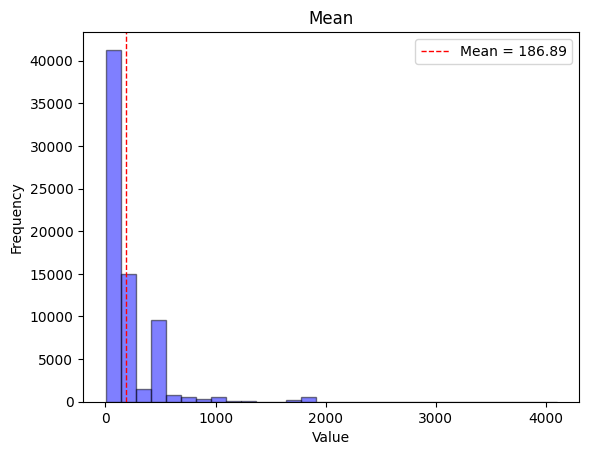

In [46]:
# Mean
# Create a histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add a vertical line at the median
mean_val = data_clean["payload_len"].mean()
plt.axvline(x=mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean_val:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Mean')

# Add legend
plt.legend()

# Show the plot
plt.show()

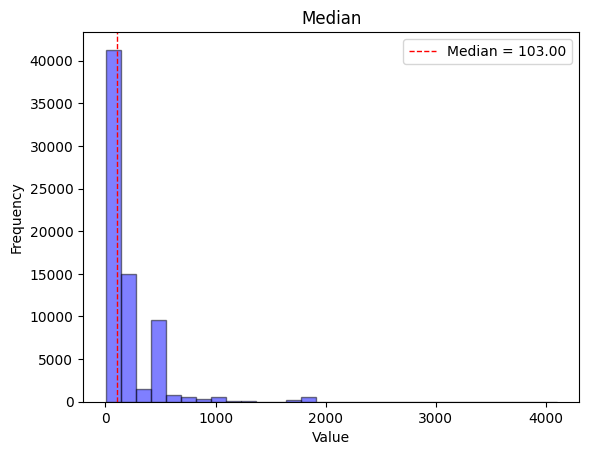

In [41]:
# median
# Create a histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add a vertical line at the median
median_val = data_clean["payload_len"].median()
plt.axvline(x=median_val, color='red', linestyle='dashed', linewidth=1, label=f'Median = {median_val:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Median')

# Add legend
plt.legend()

# Show the plot
plt.show()

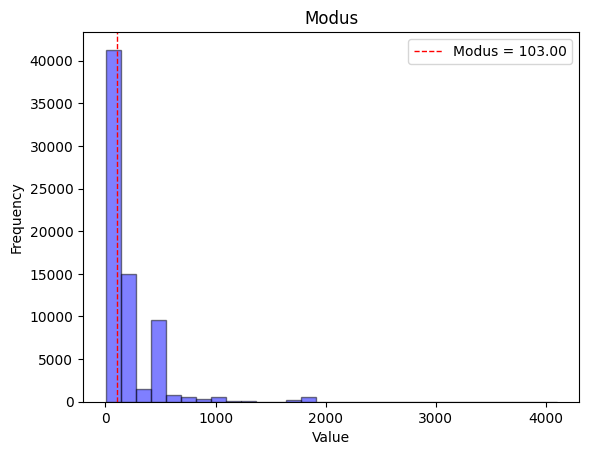

In [47]:
# modus
# Create a histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='blue')

# Add a vertical line at the mean
modes_val = data_clean["payload_len"].mode()
for i in range(len(modes_val)):
    plt.axvline(x=modes_val[i], color='red', linestyle='dashed', linewidth=1, label=f'Modus = {modes_val[i]:.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Modus')

# Add legend
plt.legend()

# Show the plot
plt.show()

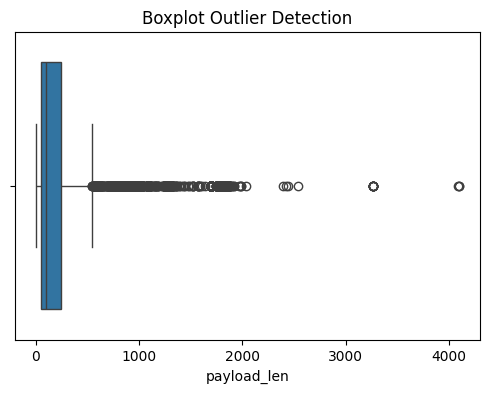

In [48]:
# Boxplot untuk deteksi outlier visual

plt.figure(figsize=(6,4))
sns.boxplot(x=data_clean["payload_len"])
plt.title("Boxplot Outlier Detection")
plt.show()

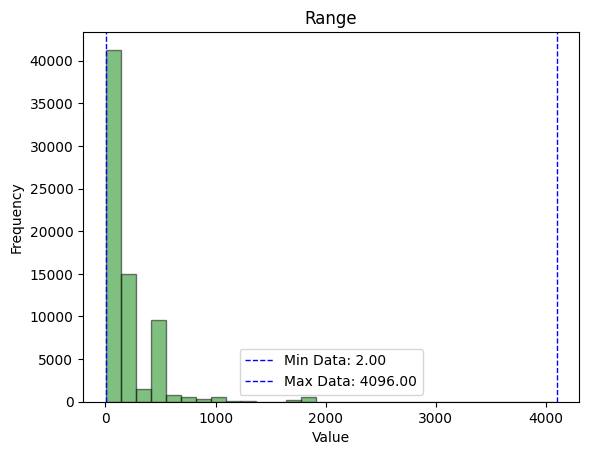

In [49]:
# visualize range
# Create a histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Add vertical line
plt.axvline(x=min(data_clean["payload_len"]), color='blue', linestyle='dashed', linewidth=1, label=f'Min Data: {min(data_clean["payload_len"]):.2f}')
plt.axvline(x=max(data_clean["payload_len"]), color='blue', linestyle='dashed', linewidth=1, label=f'Max Data: {max(data_clean["payload_len"]):.2f}')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Range')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [50]:
# Outlier Mean and Std Method
mean = data_clean["payload_len"].mean()
std = data_clean["payload_len"].std()

upper_limit = mean + 2*std
lower_limit = mean - 2*std

print(f"Mean: {mean:.2f}, Std: {std:.2f}")
print(f"Upper limit: {upper_limit:.2f}, Lower limit: {lower_limit:.2f}")

outliers = data_clean[(data_clean["payload_len"] > upper_limit) | (data_clean["payload_len"] < lower_limit)]

print("\nNormal:")
print(len(data_clean) - len(outliers))

print("\nOutliers (Mean ± 2*Std):")
print(len(outliers))

Mean: 186.89, Std: 256.02
Upper limit: 698.92, Lower limit: -325.14

Normal:
68061

Outliers (Mean ± 2*Std):
2267


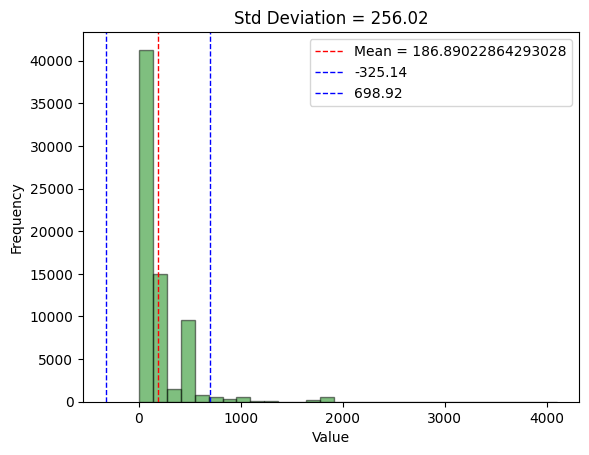

In [51]:
# Buat histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Tambahkan garis vertikal pada standar deviasi
plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean}')
plt.axvline(x=lower_limit, color='blue', linestyle='dashed', linewidth=1, label=f'{lower_limit:.2f}')
plt.axvline(x=upper_limit, color='blue', linestyle='dashed', linewidth=1, label=f'{upper_limit:.2f}')

# Tambahkan label dan judul
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'Std Deviation = {std:.2f}')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()

In [52]:
# Outlier IQR Method
Q1 = data_clean["payload_len"].quantile(0.25)
Q2 = data_clean["payload_len"].quantile(0.5)
Q3 = data_clean["payload_len"].quantile(0.75)
print("Q1:", Q1)
print("Q3:", Q3)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers_iqr = data_clean[(data_clean["payload_len"] < lower_bound) | (data_clean["payload_len"] > upper_bound)]

print("\nNormal:")
print(len(data_clean) - len(outliers_iqr))

print("\nOutliers (IQR):")
print(len(outliers_iqr))

data_normal = data_clean[(data_clean["payload_len"] >= lower_bound) & (data_clean["payload_len"] <= upper_bound)]
data_outlier = data_clean[(data_clean["payload_len"] < lower_bound) | (data_clean["payload_len"] > upper_bound)]


Q1: 50.0
Q3: 247.0
Lower Bound: -245.5
Upper Bound: 542.5

Normal:
67292

Outliers (IQR):
3036


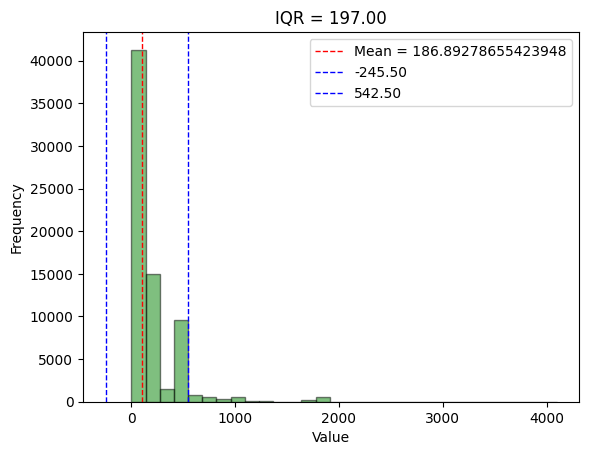

In [ ]:
# Buat histogram
plt.hist(data_clean["payload_len"], bins=30, edgecolor='black', alpha=0.5, color='green')

# Tambahkan garis vertikal pada standar deviasi
plt.axvline(x=Q2, color='red', linestyle='dashed', linewidth=1, label=f'Mean = {mean}')
plt.axvline(x=lower_bound, color='blue', linestyle='dashed', linewidth=1, label=f'{lower_bound:.2f}')
plt.axvline(x=upper_bound, color='blue', linestyle='dashed', linewidth=1, label=f'{upper_bound:.2f}')

# Tambahkan label dan judul
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f'IQR = {IQR:.2f}')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()



#4 Melakukan visualisasi data
   * Univariate Analysis (analisis satu variabel)

     * Distribusi variabel numerik (histogram, KDE plot, boxplot)
     * Distribusi variabel kategorikal (barplot, frekuensi)
     * Statistik ringkas per variabel
  * Bivariate Analysis (analisis dua variabel)

     * Numerik vs numerik: scatter plot, korelasi
     * Numerik vs kategorikal: boxplot, violin plot, uji t/ANOVA
     * Kategorikal vs kategorikal: crosstab, chi-square test, stacked barplot
  * Multivariate Analysis (analisis banyak variabel sekaligus)

     * Heatmap korelasi
     * Pairplot / scatter matrix
     * PCA atau teknik dimensionality reduction (jika dataset besar)



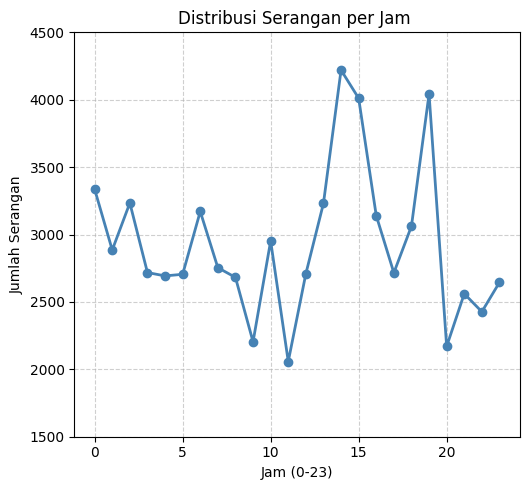

In [53]:
# Convert time column to datetime
data_clean['time'] = pd.to_datetime(data_clean['time'], errors='coerce')

# 1. Analisis kolom time
time_df = data_clean['time'].dropna()
time_counts = time_df.dt.hour.value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.plot(time_counts.index, time_counts.values, marker="o", color="steelblue", linewidth=2)
plt.ylim(1500, 4500)
plt.title("Distribusi Serangan per Jam ")
plt.xlabel("Jam (0-23)")
plt.ylabel("Jumlah Serangan")
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

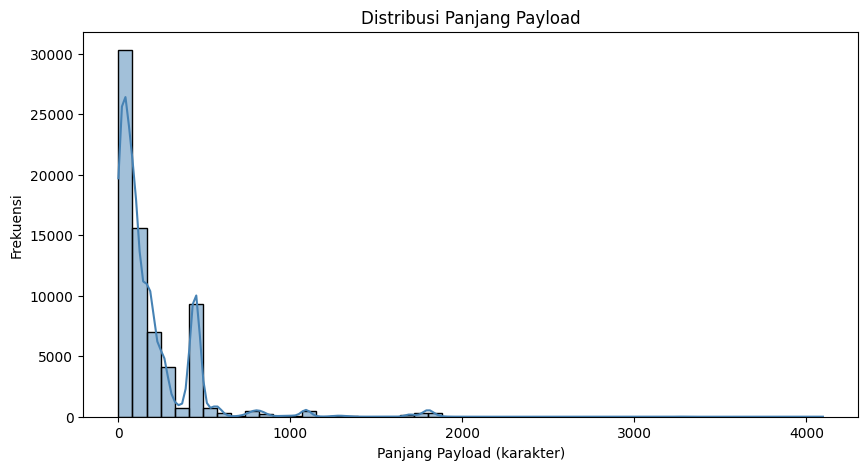

In [54]:
# 2. Analisis kolom payload (panjang payload)
plt.figure(figsize=(10,5))
sns.histplot(data_clean['payload_len'], bins=50, kde=True, color="steelblue")
plt.title("Distribusi Panjang Payload")
plt.xlabel("Panjang Payload (karakter)")
plt.ylabel("Frekuensi")
plt.show()

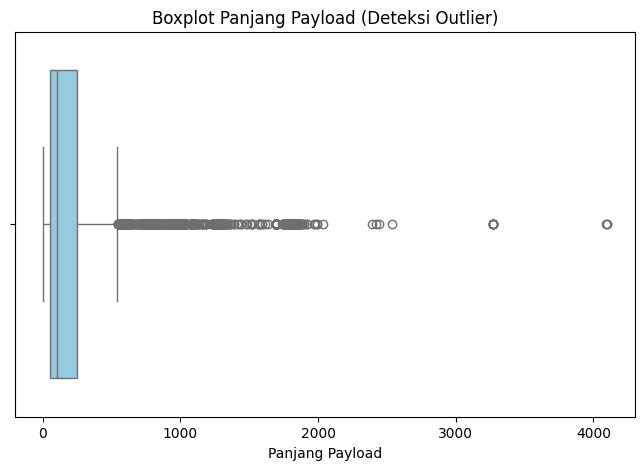

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data_clean["payload_len"], color="skyblue")
plt.title("Boxplot Panjang Payload (Deteksi Outlier)")
plt.xlabel("Panjang Payload")
plt.show()

/tmp/ipython-input-2530243561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_from.index, x=top_from.values, palette="mako")


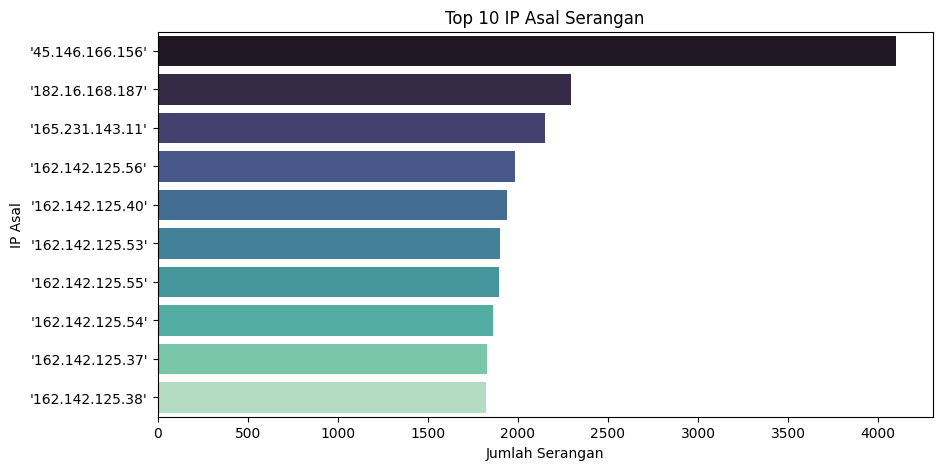

In [57]:
# 3. Analisis kolom from (IP asal)
top_from = data_clean['from'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_from.index, x=top_from.values, palette="mako")
plt.title("Top 10 IP Asal Serangan")
plt.xlabel("Jumlah Serangan")
plt.ylabel("IP Asal")
plt.show()

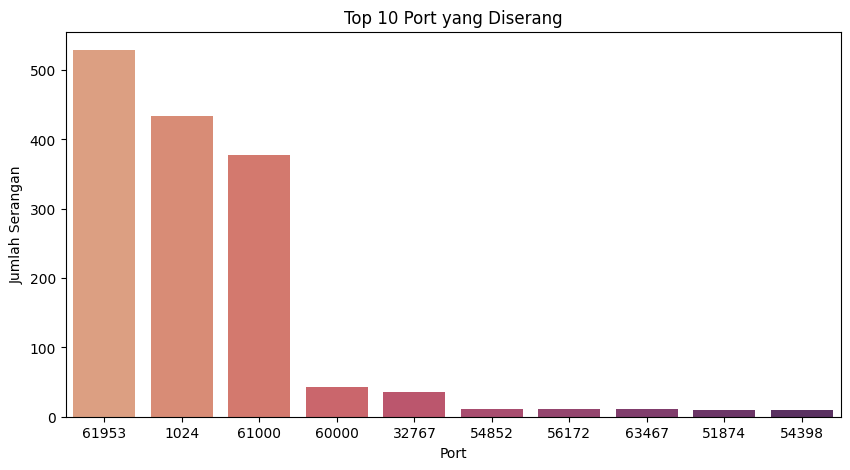

In [60]:
# 4. Analisis kolom port (port target)
top_ports = data_clean['port'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, hue=top_ports.index.astype(str), palette="flare", legend=False)
plt.title("Top 10 Port yang Diserang")
plt.xlabel("Port")
plt.ylabel("Jumlah Serangan")
plt.show()

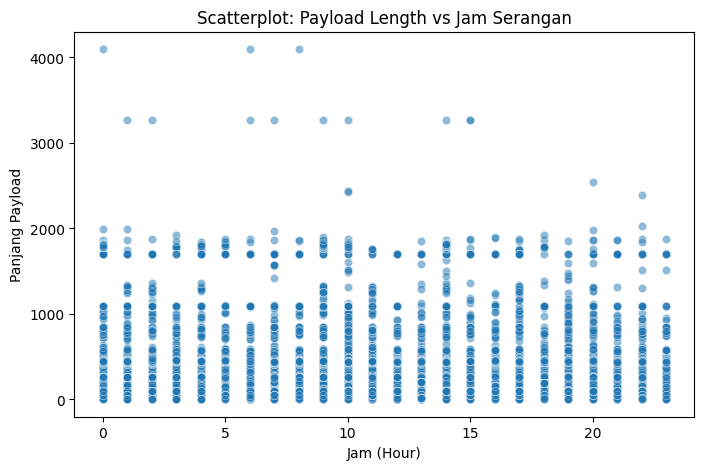

In [59]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_clean["time"].dt.hour, y=data_clean["payload_len"], alpha=0.5)
plt.title("Scatterplot: Payload Length vs Jam Serangan")
plt.xlabel("Jam (Hour)")
plt.ylabel("Panjang Payload")
plt.show()


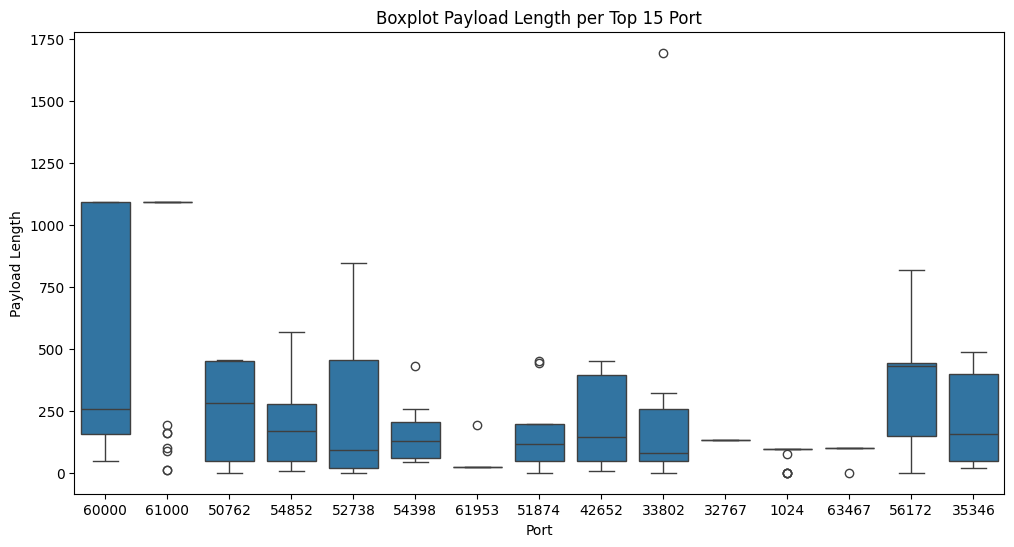

In [83]:
top_ports = data_clean["port"].value_counts().head(15).index
df_top_ports = data_clean[data_clean["port"].isin(top_ports)]

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="port", y="payload_len", data=df_top_ports)
plt.title("Boxplot Payload Length per Top 15 Port")
plt.xlabel("Port")
plt.ylabel("Payload Length")
plt.show()

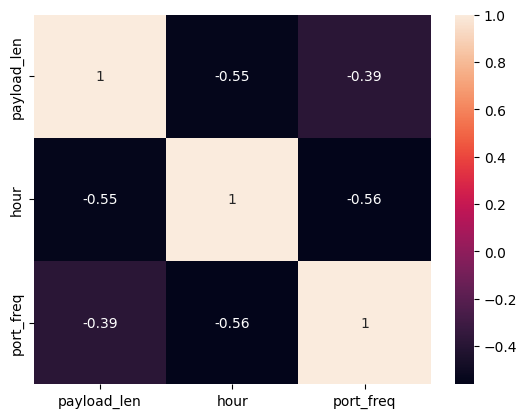

In [90]:
# visualize correlation using heatmaps
sns.heatmap(corr.corr(method='pearson'),
            annot = True);

plt.show()

# **Interpretasi Korelasi antar fitur numerik**

# **Korelasi dengan payload_len**
*   payload_len ↔ hour = -0.55 → ada hubungan negatif sedang; pada jam tertentu panjang payload cenderung lebih pendek.
*   payload_len ↔ port_freq = -0.39 → hubungan negatif lemah–sedang; port yang sering diserang cenderung punya payload lebih pendek.

# **Korelasi dengan hour**
*   hour ↔ port_freq = -0.56 → hubungan negatif sedang; jam serangan tertentu tidak bertepatan dengan port yang paling sering diserang.

# **Korelasi rendah**
*   Tidak ada korelasi positif yang kuat; semua nilai di bawah ±0.6 → hubungan antar fitur ada tapi sedang–lemah, sehingga tiap fitur masih menyumbang informasi unik.

#**5. Insight & Kesimpulan Awal**

## Insight dari Korelasi

**Payload_len vs Hour (-0.55)**

*   Ada kecenderungan payload lebih pendek pada jam-jam tertentu, menunjukkan variasi pola serangan sepanjang waktu.

**Payload_len vs Port_freq (-0.39)**
*   Port yang paling sering diserang justru cenderung memiliki payload lebih kecil, bisa menandakan serangan ringan tapi masif.

**Hour vs Port_freq (-0.56)**
*   Serangan pada port populer tidak merata sepanjang waktu; ada jam-jam tertentu port populer justru sepi diserang.


## 1. Potensi Masalah
* **Data tidak seimbang**: Distribusi data tidak merata di beberapa fitur, misalnya panjang payload → mayoritas payload pendek, sementara payload panjang hanya sedikit (outlier).
* **Missing Values**: Meskipun sudah ditangani, adanya missing values di kolom awal ('time', 'from', 'port', 'country') menunjukkan perlunya validasi data pada sumber.
* **Outliers**: Adanya outlier pada `payload_len` perlu dicermati lebih lanjut. Tergantung tujuan analisis, outlier bisa dihapus atau dianalisis khusus karena bisa mewakili serangan tidak biasa.
* **Korelasi semua negatif**: Fitur numerik (`payload_len`, `hour`, `port_freq`) tidak bergerak searah. Ini bisa menyulitkan bila dipakai bersama dalam model prediktif, dan menunjukkan perlunya fitur tambahan.
* **Korelasi sedang (-0.39 s.d. -0.56)**: Hubungan ada tapi tidak kuat, sehingga fitur ini tidak cukup menjelaskan pola serangan secara utuh.
* **Tidak ada korelasi positif kuat**: Bisa jadi fitur yang ada belum cukup representatif untuk menggambarkan pola serangan (misalnya perlu ditambah fitur `country`, `payload_type`, atau `attack_signature`).

---

## 2. Insight
* **Distribusi Serangan per Jam**: Serangan memiliki pola distribusi per jam dengan beberapa puncak aktivitas → ada jam rawan yang bisa menjadi fokus mitigasi.
* **Distribusi Panjang Payload**: Sebagian besar serangan berisi payload pendek, namun terdapat payload sangat panjang (outlier) yang mungkin mengindikasikan jenis serangan khusus.
* **IP Asal Terbanyak**: Ada beberapa IP asal yang paling sering melakukan serangan, bisa menjadi target investigasi lebih lanjut atau pemblokiran.
* **Port yang Paling Banyak Diserang**: Beberapa port menjadi target utama serangan, menunjukkan kerentanan atau popularitas layanan di port tersebut.




# **Kesimpulan**
- Hubungan antar fitur numerik (`payload_len`, `hour`, `port_freq`) bersifat negatif dengan kekuatan sedang → tiap fitur masih menyumbang informasi unik (tidak redundant).  
- Payload panjang cenderung terjadi pada jam tertentu atau di port yang jarang diserang.  
- Port populer tidak selalu aktif di jam ramai, sehingga pola waktu sangat memengaruhi distribusi target serangan.  
- Analisis awal ini bermanfaat untuk memahami pola serangan, namun fitur tambahan (misalnya `country`, `attack_type`, atau `payload_signature`) diperlukan agar analisis dan deteksi lebih akurat.  